Auto reload

In [1]:
%load_ext autoreload
%autoreload 2

import statements

In [2]:

%matplotlib inline

import numpy as np

import torch.nn as nn

from data import ChristmasImages
from model import Network

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models



from torch.utils import data


Data loader

In [3]:
training_set_path = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/train'
test_set_path  = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/evaluation/dataset/data'
batch_size_train = 256

training_set = ChristmasImages(training_set_path)
testset  = ChristmasImages(test_set_path)

trainloader  = data.DataLoader(training_set, batch_size = batch_size_train, shuffle = True)
testloader = data.DataLoader(testset, batch_size=10, shuffle=True)



Visualing the data loader

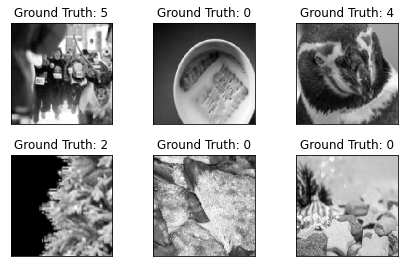

In [4]:
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

Forward pass

In [3]:
vgg16 = Network()

In [4]:
print(vgg16)

Network(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): 

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Loss calculation

In [5]:
# optimizer
vgg16 = Network()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()

In [6]:
# validation function
def validate(model, test_dataloader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    for int, data in enumerate(test_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)
        
        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == target).sum().item()
    
    val_loss = val_running_loss/len(test_dataloader.dataset)
    val_accuracy = 100. * val_running_correct/len(test_dataloader.dataset)
    
    return val_loss, val_accuracy

Function for training

In [7]:
# training function
def fit(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
    train_loss = train_running_loss/len(train_dataloader.dataset)
    train_accuracy = 100. * train_running_correct/len(train_dataloader.dataset)
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')
    
    return train_loss, train_accuracy

Training

In [11]:
train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []
start = time.time()
for epoch in range(10):
    print("Epoch: {}".format(epoch))
    train_epoch_loss, train_epoch_accuracy = fit(vgg16, trainloader)
    #val_epoch_loss, val_epoch_accuracy = validate(vgg16, testloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    #val_loss.append(val_epoch_loss)
    #val_accuracy.append(val_epoch_accuracy)
end = time.time()
print((end-start)/60, 'minutes')

Epoch: 0
Train Loss: 0.0060, Train Acc: 48.44
Epoch: 1
Train Loss: 0.0034, Train Acc: 71.85
Epoch: 2
Train Loss: 0.0029, Train Acc: 75.34
Epoch: 3
Train Loss: 0.0027, Train Acc: 76.73
Epoch: 4
Train Loss: 0.0027, Train Acc: 77.78
Epoch: 5
Train Loss: 0.0025, Train Acc: 78.61
Epoch: 6
Train Loss: 0.0025, Train Acc: 78.93
Epoch: 7
Train Loss: 0.0024, Train Acc: 79.82
Epoch: 8
Train Loss: 0.0025, Train Acc: 79.50
Epoch: 9
Train Loss: 0.0025, Train Acc: 79.50
630.9381312529246 minutes


In [29]:
print (val_loss)
print(val_accuracy)

[0.7581302672624588, 0.6886113375425339, 0.5816192746162414, 0.5233453512191772, 0.644204618036747, 0.6188802808523178, 0.6492694169282913, 0.6475383400917053, 0.6505928486585617, 0.6728022247552872]
[0.0, 1.875, 9.375, 15.0, 11.875, 13.125, 11.875, 12.5, 11.875, 13.75]


In [12]:
print (train_loss)
print(train_accuracy)

[0.005986787814704948, 0.0034317711765127546, 0.0028842726639375467, 0.0027223089114991298, 0.0026524478846574047, 0.002542923310080716, 0.002502437295033224, 0.002430688147895514, 0.0024815293661830124, 0.002461045820483967]
[48.44337090713902, 71.84648416532474, 75.33548040794417, 76.73107890499195, 77.77777777777777, 78.60976918947934, 78.93183038110574, 79.81749865807836, 79.49543746645196, 79.49543746645196]


Saving the model's weitghts

In [13]:
vgg16.save_model()

Inference

utils.py

In [7]:
import torch
from torch.utils.data import Dataset
import csv
from data import ChristmasImages


class TestSet(Dataset):
    
    def __init__(self, path):
        super().__init__()
        self.dataset = ChristmasImages(path + '/data/val', training=False)
        
        with open(path + '/val.csv') as file:
            reader = csv.reader(file)
            next(reader)
            labels = {}
            for row in reader:
                labels[int(row[0])] = int(row[1])
        self.labels = labels

        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.dataset[idx][0]
        label = self.labels[idx]
        return image, label

def evaluate(model, loader):
    accuracy = 0.
    i = 0
    with torch.no_grad():
        for image, label in loader:
            _, prediction = model(image).max(dim=1)
            accuracy += (prediction == label).sum().item()
            print("{},{}".format(i,prediction.item()))
            #print("{}: prediction: {},label: {}".format(i,prediction.item(),label.item()))
            i+=1
    accuracy /= len(loader)
    return accuracy*100


evaluate.py

0,7
1,5
2,1
3,5
4,1
5,0
6,5
7,3
8,4
9,3
10,2
11,3
12,4
13,6
14,1
15,2
16,2
17,2
18,7
19,3
20,7
21,3
22,4
23,7
24,0
25,6
26,4
27,2
28,5
29,7
30,2
31,0
32,1
33,4
34,2
35,1
36,2
37,5
38,6
39,2
40,0
41,5
42,6
43,6
44,3
45,5
46,2
47,7
48,0
49,7
50,6
51,1
52,4
53,6
54,4
55,0
56,5
57,3
58,6
59,1
60,0
61,7
62,2
63,3
64,1
65,2
66,0
67,2
68,7
69,2
70,2
71,4
72,4
73,0
74,3
75,4
76,7
77,3
78,5
79,7
80,1
81,0
82,0
83,4
84,5
85,6
86,2
87,6
88,1
89,7
90,2
91,7
92,0
93,5
94,4
95,3
96,4
97,4
98,7
99,5
100,1
101,6
102,4
103,3
104,5
105,1
106,0
107,5
108,3
109,1
110,6
111,1
112,5
113,4
114,7
115,0
116,3
117,2
118,7
119,1
120,7
121,3
122,2
123,6
124,6
125,6
126,1
127,6
128,4
129,6
130,3
131,3
132,2
133,4
134,7
135,1
136,0
137,3
138,1
139,0
140,6
141,6
142,0
143,0
144,2
145,7
146,4
147,1
148,3
149,4
150,2
151,2
152,7
153,7
154,5
155,0
156,5
157,7
158,2
159,1
88.75


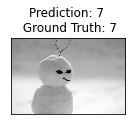

In [10]:
import torch
from torch.utils.data import DataLoader


# dataset location
path = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/evaluation/dataset'

model = vgg16.eval()
model.load_state_dict(torch.load('model'))

loader = DataLoader(TestSet(path), batch_size=1)

examples = enumerate(loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)
    
fig = plt.figure()
for i in range(1):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {} \n Ground Truth: {}".
              format(output.data.max(1, keepdim=True)[1][i].item(),example_targets.item()))

    plt.xticks([])
    plt.yticks([])

print(evaluate(model, loader))

In [9]:
import torch
from torch.utils.data import DataLoader
from model import Network
from utils import TestSet, evaluate

# dataset location
path = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/evaluation/dataset'

model = Network().eval()
model.load_state_dict(torch.load('model'))

loader = DataLoader(TestSet(path), batch_size=1)

print(evaluate(model, loader))

0,7
1,5
2,1
3,5
4,1
5,0
6,5
7,3
8,4
9,3
10,2
11,3
12,4
13,6
14,1
15,2
16,2
17,2
18,7
19,3
20,7
21,3
22,4
23,7
24,0
25,6
26,4
27,2
28,5
29,7
30,2
31,0
32,1
33,4
34,2
35,1
36,2
37,5
38,6
39,2
40,0
41,5
42,6
43,6
44,3
45,5
46,2
47,7
48,0
49,7
50,6
51,1
52,4
53,6
54,4
55,0
56,5
57,3
58,6
59,1
60,0
61,7
62,2
63,3
64,1
65,2
66,0
67,2
68,7
69,2
70,2
71,4
72,4
73,0
74,3
75,4
76,7
77,3
78,5
79,7
80,1
81,0
82,0
83,4
84,5
85,6
86,2
87,6
88,1
89,7
90,2
91,7
92,0
93,5
94,4
95,3
96,4
97,4
98,7
99,5
100,1
101,6
102,4
103,3
104,5
105,1
106,0
107,5
108,3
109,1
110,6
111,1
112,5
113,4
114,7
115,0
116,3
117,2
118,7
119,1
120,7
121,3
122,2
123,6
124,6
125,6
126,1
127,6
128,4
129,6
130,3
131,3
132,2
133,4
134,7
135,1
136,0
137,3
138,1
139,0
140,6
141,6
142,0
143,0
144,2
145,7
146,4
147,1
148,3
149,4
150,2
151,2
152,7
153,7
154,5
155,0
156,5
157,7
158,2
159,1
0.8875
